# FASTag Toll Plaza Acquirer Data

This notebook visualizes data from list of tollplazas enabled for monthly pass / bulk pass via FASTag, a NPCI run toll payment system.

## Get FASTag Pass Data
Access FASTag Monthly Pass page and download Toll Plaza data

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import tabulate
import pandas as pd

In [ ]:
url = 'http://sujeetkumar-001-site1.itempurl.com/'

soup = BeautifulSoup(requests.get(url).text,features="lxml")
plaza_tags = soup.find_all('option')
plazas = []
for plaza_tag in plaza_tags[1:]:
    plaza = {}
    plaza['tollplaza_code'] = plaza_tag['value'].split('~')[0]
    plaza['acquirer_code'] = plaza_tag['value'].split('~')[1]
    plaza['tollplaza_name'] = plaza_tag.text.strip()
    plazas.append(plaza)

## Acquirer ID-Name Mapping

In [ ]:
acquirers = [
  {
    "acquirer_code": '700002',
    "Toll Acquirer Name": "HDFC Bank"
  },
  {
    "acquirer_code": '720026',
    "Toll Acquirer Name": "IDBI Bank"
  },
  {
    "acquirer_code": '720001',
    "Toll Acquirer Name": "Axis Bank"
  },
  {
    "acquirer_code": '720022',
    "Toll Acquirer Name": "Kotak"
  },
  {
    "acquirer_code": '720025',
    "Toll Acquirer Name": "Equitas"
  },
  {
    "acquirer_code": '720201',
    "Toll Acquirer Name": "SBI - Hitachi Payments"
  },
  {
    "acquirer_code": '720301',
    "Toll Acquirer Name": "ICICI Bank"
  },
  {
    "acquirer_code": '720303',
    "Toll Acquirer Name": "ICICI MH"
  },
  {
    "acquirer_code": '720377',
    "Toll Acquirer Name": "IDFC Bank"
  },
  {
    "acquirer_code": '720424',
    "Toll Acquirer Name": "PayTM Payments Bank"
  },
  {
    "acquirer_code": '720613',
    "Toll Acquirer Name": "PayTM Payments Bank"
  },
  {
    "acquirer_code": '720014',
    "Toll Acquirer Name": "IndusInd"
  }
]

Print Acquirer Codes

In [ ]:
acquirer_codes = list(set(acquirer['acquirer_code'] for acquirer in acquirers))
print(acquirer_codes)

['720424', '720025', '720022', '720377', '720613', '700002', '720026', '720303', '720001', '720201', '720301', '720014']


## Print Toll Plaza List as Table

In [ ]:
df = pd.DataFrame(plazas)
print(df)

# header = plazas[0].keys()
# rows =  [x.values() for x in plazas]
# print(tabulate.tabulate(rows, header))

    tollplaza_code acquirer_code                 tollplaza_name
0           244000        720301           18th Mile Toll Plaza
1           320053        720424               Aaini Toll Plaza
2           352028        720424           Agnampadi Toll Plaza
3           187002        720001            Ahmadpur Toll Plaza
4           002006        720301  Ahmedabad (Ring Road) Toll Pl
..             ...           ...                            ...
844         340003        720377             Yedashi Toll Plaza
845         356024        720424             Yeddore Toll Plaza
846         350036        720424            Yerkaram Toll Plaza
847         352043        720377          Yerradoddi Toll Plaza
848         314019        720424               Zidda Toll Plaza

[849 rows x 3 columns]


## New Acquirers

List of acquirers, not present in acquirers list

In [ ]:
df[~df.acquirer_code.isin(acquirer_codes)]

Empty DataFrame
Columns: [tollplaza_code, acquirer_code, tollplaza_name]
Index: []

In [ ]:
df2 = pd.DataFrame(acquirers)
df = pd.merge(df, df2, on = "acquirer_code", how = "inner")

Total FASTag Toll Plazas  849
------------------------------
PayTM Payments Bank       288
IDFC Bank                 220
ICICI Bank                190
HDFC Bank                  69
Axis Bank                  32
ICICI MH                   19
SBI - Hitachi Payments     17
Kotak                      10
IDBI Bank                   3
Equitas                     1
Name: Toll Acquirer Name, dtype: int64


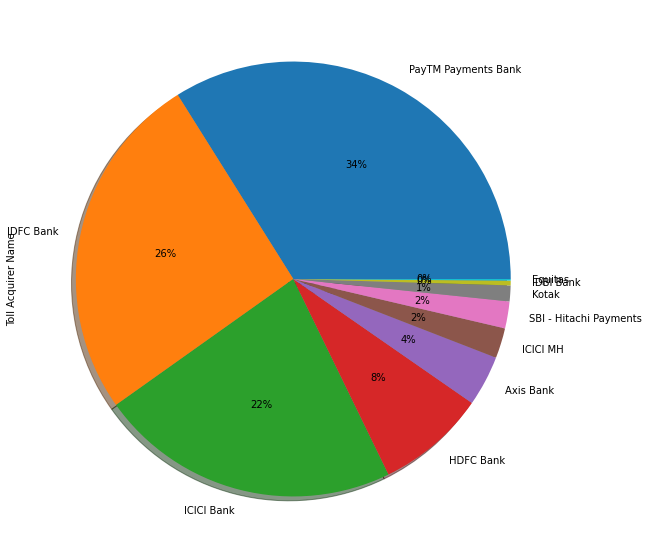

In [ ]:
df['Toll Acquirer Name'].squeeze().value_counts().plot(kind='pie',subplots=True, figsize=(30, 10),autopct='%1.0f%%', shadow=True, labeldistance=1.1, rotatelabels=False)
print('Total FASTag Toll Plazas  ' + str(len(df)))
print('------------------------------')
print(df['Toll Acquirer Name'].value_counts())